# Notebook para tratamento dos dados de taxonomia da microbiota intestinal dos bebês 👶🏽💩

In [13]:
#importações 

import plotly.graph_objects as go
import pandas as pd
import os
import seaborn.objects as so
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.colors as colors

In [14]:
#Lendo os arquivos

arquivos_colostrum = 'C:\JupyterLab\estudos_2024\TCC_leite_materno\Metaphlan\gtdb_colostrum'
df_colostrum_tax = pd.DataFrame([])
for file in os.listdir(arquivos_colostrum):
    df_colostrum_tax_i = pd.read_csv(os.path.join(arquivos_colostrum, file), sep='\t')
    df_colostrum_tax = pd.concat([df_colostrum_tax, df_colostrum_tax_i])

arquivos_LM1 = 'C:\JupyterLab\estudos_2024\TCC_leite_materno\Metaphlan\gtdb_LM1'
df_LM1_tax = pd.DataFrame([])
for file in os.listdir(arquivos_LM1):
    df_LM1_tax_i = pd.read_csv(os.path.join(arquivos_LM1, file), sep='\t')
    df_LM1_tax = pd.concat([df_LM1_tax, df_LM1_tax_i])

In [15]:
#Organizando os dados

colunas_classificacao = ['Domínio', 'Filo', 'Classe', 'Ordem', 'Família','Gênero', 'Espécie']
df_colostrum_tax[colunas_classificacao] = df_colostrum_tax['#clade_name'].str.split(';', expand=True)
df_LM1_tax[colunas_classificacao] = df_LM1_tax['#clade_name'].str.split(';', expand=True)

In [16]:
#Filtrando os dados

df_colostrum_tax = df_colostrum_tax[df_colostrum_tax['#clade_name'] != 'None']

df_LM1_tax = df_LM1_tax[df_LM1_tax['#clade_name'] != 'None']

In [18]:
# Função para contar as frequências de cada item da classificação
def contar_frequencias(df, coluna):
    # Contagem de frequências
    frequencias = df[coluna].value_counts().to_dict()
    # Preencher lista com frequências
    return [frequencias.get(value, 0) for value in df[coluna]]

frequencias_tax_colostrum = [] # Lista para armazenar todas as frequências 
frequencias_tax_LM1 = []

# Colunas taxonômicas a serem processadas
colunas = ["Domínio", "Filo", "Classe", "Ordem", "Família", "Gênero", "Espécie"]

# Preencher a lista com as frequências
for coluna in colunas:
    frequencias_tax_colostrum.extend(contar_frequencias(df_colostrum_tax, coluna))
    frequencias_tax_LM1.extend(contar_frequencias(df_LM1_tax, coluna))

## Plot Sankey 🪢

In [22]:
def plot_taxonomy_sankey(df,titulo,value):
    stats_data = df
   
    #stats_data

    taxonomies = stats_data[stats_data["#clade_name"].notna()][
        "#clade_name"
    ].tolist()

    sources = []
    targets = []
    values = value

    for taxonomy in taxonomies:
        taxonomy_levels = taxonomy.split(";")
        for i in range(len(taxonomy_levels) - 1):
            sources.append(taxonomy_levels[i])
            targets.append(taxonomy_levels[i + 1])
            
    

    all_taxonomies = list(set(sources + targets))
    taxonomy_to_index = {taxonomy: i for i, taxonomy in enumerate(all_taxonomies)}

    colors = [
        "#00CED1",
        "#7FFFD4",
        "#FFB6C1",
        "#E6E6FA",
        "#D8BFD8",
        "#BA55D3",
        "#87CEFA",
        "#DC143C",
        "#FFD700",
        "#7B68EE",
        "#FF00FF",
        "#98FB98",
        "#5F9EA0",
        "#8B008B",
        "#CD5C5C",
        "#F0E68C",
        "#32CD32"


    ]

    fig = go.Figure(
        data=[
            go.Sankey(
                node=dict(
                    pad=20,
                    thickness=30,
                    line=dict(color="black", width=0.5),
                    label=all_taxonomies,
                    color=colors * (len(all_taxonomies) // len(colors) + 1),
                    #itle=node_titles 
                ),
                link=dict(
                    source=[taxonomy_to_index[source] for source in sources],
                    target=[taxonomy_to_index[target] for target in targets],
                    value=values,
                    #color = colors
                    color="#DCDCDC",
                   #color="rgba(0, 0, 0, 0.5)"
                )
            )
        ]
    )

    fig.update_layout(
        title_text=titulo,
        font_size=12,
        title_font_size=20,
        
    )

    fig.update_layout(
    width=4000,
    height=1000
)

    return fig

In [23]:
plot_taxonomy_sankey(df_colostrum_tax, 'Sankey Taxonomia Colostro',frequencias_tax_colostrum)

In [24]:
plot_taxonomy_sankey(df_LM1_tax, 'Sankey Taxonomia Leite Materno após 1 mês',frequencias_tax_LM1)

# Organizando Dados de Abundância 🗃️

In [61]:
df_filo_abundancia_colostrum =  df_colostrum_tax["Filo"].value_counts().rename_axis('Filos').reset_index(name='Contagem')
df_filo_abundancia_LM1 =  df_LM1_tax["Filo"].value_counts().rename_axis('Filos').reset_index(name='Contagem')
df_filo_abundancia = pd.merge(df_filo_abundancia_colostrum, df_filo_abundancia_LM1, on='Filos', how='outer')

df_filo_abundancia.fillna(0, inplace=True)
df_filo_abundancia.rename(columns={'Contagem_x': 'Colostro', 'Contagem_y': 'Leite Materno de 1 mês'}, inplace=True)
#df_filo_abundancia

In [76]:
df_genero_abundancia_colostrum =  df_colostrum_tax["Gênero"].value_counts().rename_axis('Gêneros').reset_index(name='Contagem')
df_genero_abundancia_LM1 =  df_LM1_tax["Gênero"].value_counts().rename_axis('Gêneros').reset_index(name='Contagem')
df_genero_abundancia = pd.merge(df_genero_abundancia_colostrum, df_genero_abundancia_LM1, on='Gêneros', how='outer')

df_genero_abundancia.fillna(0, inplace=True)
df_genero_abundancia.rename(columns={'Contagem_x': 'Colostro', 'Contagem_y': 'Leite Materno de 1 mês'}, inplace=True)
#df_genero_abundancia

In [53]:
df_especie_abundancia_colostrum =  df_colostrum_tax["Espécie"].value_counts().rename_axis('Espécies').reset_index(name='Contagem')
df_especie_abundancia_LM1 =  df_LM1_tax["Espécie"].value_counts().rename_axis('Espécies').reset_index(name='Contagem')
df_especie_abundancia = pd.merge(df_especie_abundancia_colostrum, df_especie_abundancia_LM1, on='Espécies', how='outer')

df_especie_abundancia.fillna(0, inplace=True)
df_especie_abundancia.rename(columns={'Contagem_x': 'Colostro', 'Contagem_y': 'Leite Materno de 1 mês'}, inplace=True)
#df_especie_abundancia

In [54]:
df_ordem_abundancia_colostrum = df_colostrum_tax["Ordem"].value_counts().rename_axis('Ordens').reset_index(name='Contagem')
df_ordem_abundancia_LM1 =  df_LM1_tax["Ordem"].value_counts().rename_axis('Ordens').reset_index(name='Contagem')
df_ordem_abundancia = pd.merge(df_ordem_abundancia_colostrum, df_ordem_abundancia_LM1, on='Ordens', how='outer')

df_ordem_abundancia.fillna(0, inplace=True)
df_ordem_abundancia.rename(columns={'Contagem_x': 'Colostro', 'Contagem_y': 'Leite Materno de 1 mês'}, inplace=True)
#df_ordem_abundancia

## Representação dos dados de taxonomia em Gráficos de Barras 📊

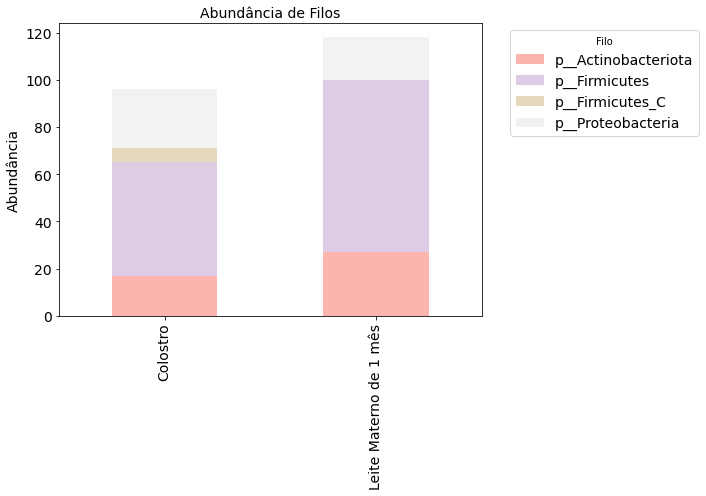

In [48]:
# Definir a coluna 'Filos' como índice
df_filo_abundancia.set_index('Filos', inplace=True)

# Transpor o DataFrame
df_filo_abundancia_t = df_filo_abundancia.T

# Criar o gráfico de barras empilhadas
ax1 = df_filo_abundancia_t.plot(kind='bar', stacked=True, figsize=(10, 7), cmap='Pastel1', fontsize=14)

# Adicionar título e rótulos aos eixos
ax1.set_title('Abundância de Filos', fontsize=14)
ax1.set_ylabel('Abundância', fontsize=14)

# Adicionar legenda
plt.legend(title='Filo', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

# Exibir o gráfico
plt.tight_layout()

plt.savefig('abundancia_filo_LM.png')
plt.show()

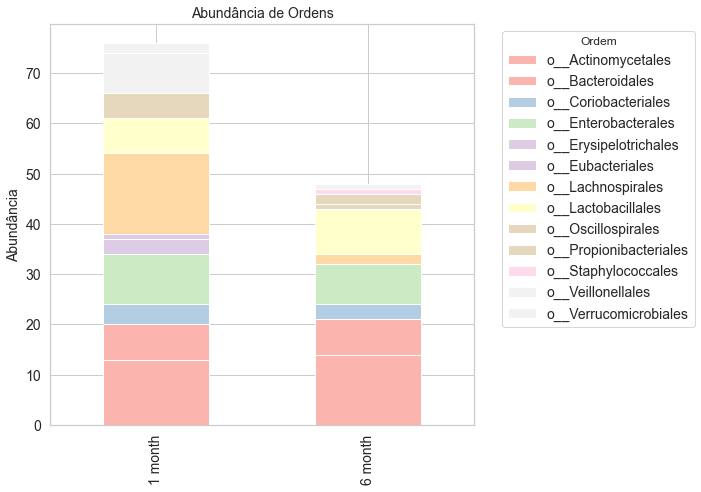

In [121]:
# Definir a coluna 'Ordens' como índice
df_ordem_abundancia.set_index('Ordens', inplace=True)

# Transpor o DataFrame 
df_ordem_abundancia_t = df_ordem_abundancia.T

# Criar o gráfico de barras empilhadas
ax1 = df_ordem_abundancia_t.plot(kind='bar', stacked=True, figsize=(10, 7), cmap='Pastel1', fontsize=14)

# Adicionar título e rótulos aos eixos
ax1.set_title('Abundância de Ordens', fontsize=14)
ax1.set_ylabel('Abundância', fontsize=14)

# Adicionar legenda
plt.legend(title='Ordem', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

# Exibir o gráfico
plt.tight_layout()

plt.savefig('abund_ordem.png')
plt.show()

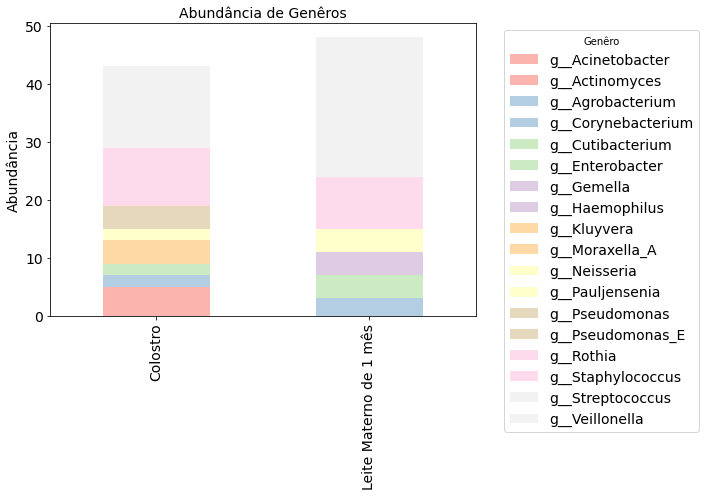

In [49]:
# Definir a coluna 'Gêneros' como índice
df_genero_abundancia.set_index('Gêneros', inplace=True)

# Transpor o DataFrame 
df_genero_abundancia_t = df_genero_abundancia.T

# Criar o gráfico de barras empilhadas
ax1 = df_genero_abundancia_t.plot(kind='bar', stacked=True, figsize=(10, 7), cmap='Pastel1', fontsize=14)

# Adicionar título e rótulos aos eixos
ax1.set_title('Abundância de Genêros', fontsize=14)
ax1.set_ylabel('Abundância', fontsize=14)

# Adicionar legenda
plt.legend(title='Gênero', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

# Exibir o gráfico
plt.tight_layout()

plt.savefig('abund_genero.png')
plt.show()

In [56]:
df_filo_abundancia

,Filos,Colostro,Leite Materno de 1 mês
0,p__Actinobacteriota,17,27.0
1,p__Firmicutes,48,73.0
2,p__Firmicutes_C,6,0.0
3,p__Proteobacteria,25,18.0


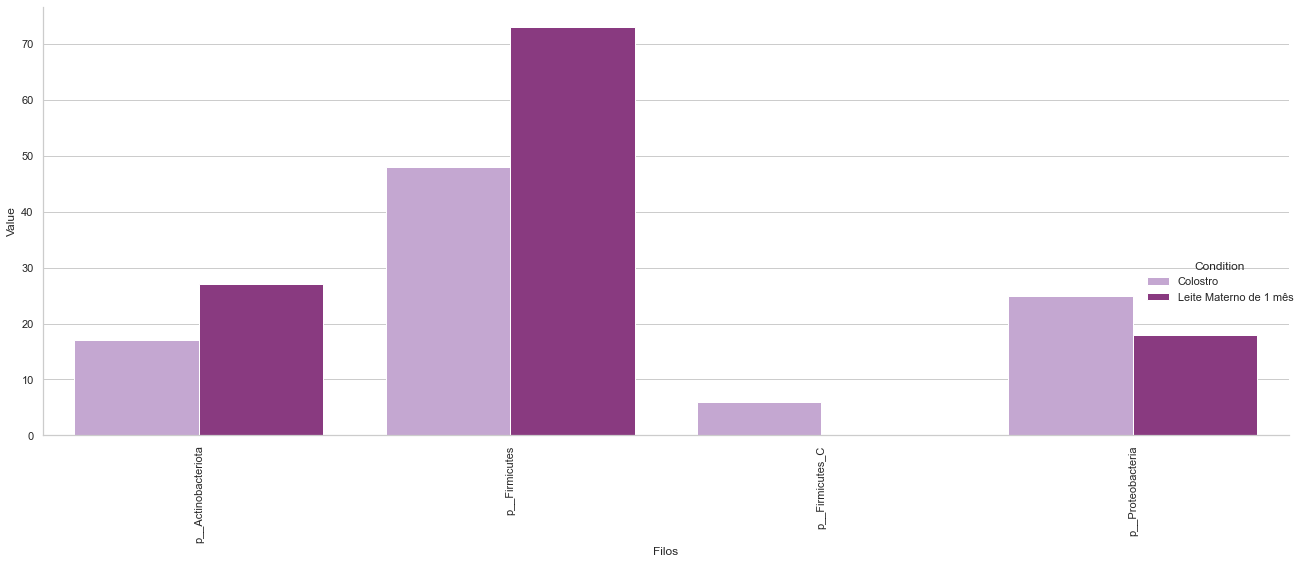

In [58]:
df_long_filo = df_filo_abundancia.melt(id_vars="Filos", value_vars=["Colostro", "Leite Materno de 1 mês"], 
                                  var_name="Condition", value_name="Value")

# Criando o gráfico com seaborn
sns.set(style="whitegrid")
plot = sns.catplot(x="Filos", y="Value", hue="Condition", data=df_long_filo, 
                   kind="bar", height=8, aspect=2, palette={"Colostro": "#c6a0d8", "Leite Materno de 1 mês": "#962d8a"})

# Rotacionar os rótulos do eixo x para melhor visualização
plot.set_xticklabels(rotation=90)
plt.tight_layout()

plt.savefig('bar_filo.png')
plt.show()

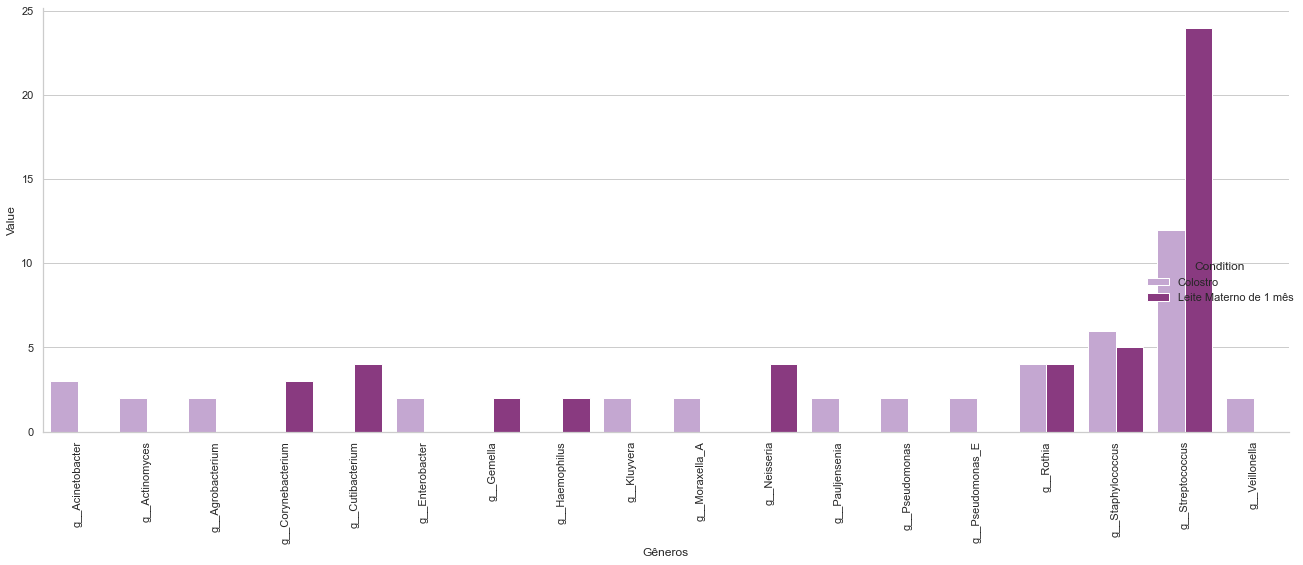

In [59]:
df_long_genero = df_genero_abundancia.melt(id_vars="Gêneros", value_vars=["Colostro", "Leite Materno de 1 mês"], 
                                  var_name="Condition", value_name="Value")

# Criando o gráfico com seaborn
sns.set(style="whitegrid")
plot = sns.catplot(x="Gêneros", y="Value", hue="Condition", data=df_long_genero, 
                   kind="bar", height=8, aspect=2, palette={"Colostro": "#c6a0d8", "Leite Materno de 1 mês": "#962d8a"})

# Rotacionar os rótulos do eixo x para melhor visualização
plot.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()

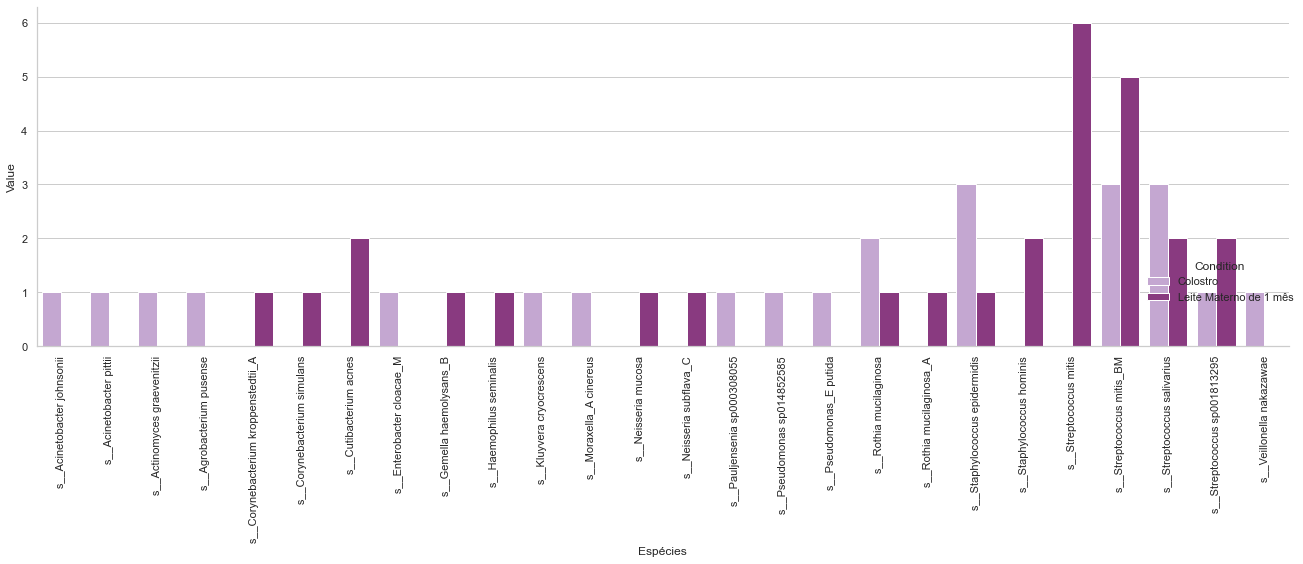

In [60]:
df_long_especie = df_especie_abundancia.melt(id_vars="Espécies", value_vars=["Colostro", "Leite Materno de 1 mês"], 
                                  var_name="Condition", value_name="Value")

# Criando o gráfico com seaborn
sns.set(style="whitegrid")
plot = sns.catplot(x="Espécies", y="Value", hue="Condition", data=df_long_especie, 
                   kind="bar", height=8, aspect=2, palette={"Colostro": "#c6a0d8", "Leite Materno de 1 mês": "#962d8a"})

# Rotacionar os rótulos do eixo x para melhor visualização
plot.set_xticklabels(rotation=90)
plt.tight_layout()
plt.show()

In [62]:
# Definir a coluna 'Filos' como índice
df_filo_abundancia.set_index('Filos', inplace=True)

# Transpor o DataFrame para que os grupos (Obesos e Lean) sejam as colunas
df_filo_abundancia_t = df_filo_abundancia.T

# Definir uma paleta de cores personalizada
custom_colors = colors.qualitative.Pastel  # Outra opção seria colors.qualitative.Set3 ou qualquer paleta disponível

# Criar uma lista de barras empilhadas
fig = go.Figure()

# Adicionar cada filo ao gráfico como uma barra empilhada com cores personalizadas
for i, filo in enumerate(df_filo_abundancia_t.columns):
    fig.add_trace(go.Bar(
        name=filo,
        x=df_filo_abundancia_t.index, 
        y=df_filo_abundancia_t[filo],  # Valores de abundância
        hoverinfo='name+y',
        text=df_filo_abundancia_t[filo],  # Exibir valores de abundância nas barras
        marker_color=custom_colors[i % len(custom_colors)],  # Aplicar cores da paleta
    ))

# Definir o layout do gráfico, ajustando o tamanho (mais comprido) e a paleta de cores
fig.update_layout(
    barmode='stack',  # Empilhar as barras
    title='Abundância de Filos',
    xaxis_title='Período de vida',
    yaxis_title='Abundância',
    legend_title='Filo',
    font=dict(size=14),
    legend=dict(x=1.05, y=1, borderwidth=1),  # Posicionar a legenda
    width=1200,  # Ajustar a largura do gráfico
    height=600,  # Ajustar a altura do gráfico
)

# Exibir o gráfico
fig.show()

# Salvar o gráfico como imagem (png)
#fig.write_image('abund_filo_custom_plotly.png')


In [77]:
# Definir a coluna 'Filos' como índice
df_genero_abundancia.set_index('Gêneros', inplace=True)

# Transpor o DataFrame para que os grupos (Obesos e Lean) sejam as colunas
df_genero_abundancia_t = df_genero_abundancia.T

# Definir uma paleta de cores personalizada
custom_colors = colors.qualitative.Pastel  # Outra opção seria colors.qualitative.Set3 ou qualquer paleta disponível

# Criar uma lista de barras empilhadas
fig = go.Figure()

# Adicionar cada filo ao gráfico como uma barra empilhada com cores personalizadas
for i, genero in enumerate(df_genero_abundancia_t.columns):
    fig.add_trace(go.Bar(
        name=genero,
        x=df_genero_abundancia_t.index, 
        y=df_genero_abundancia_t[genero],  # Valores de abundância
        hoverinfo='name+y',
        text=df_genero_abundancia_t[genero],  # Exibir valores de abundância nas barras
        marker_color=custom_colors[i % len(custom_colors)],  # Aplicar cores da paleta
    ))

# Definir o layout do gráfico, ajustando o tamanho (mais comprido) e a paleta de cores
fig.update_layout(
    barmode='stack',  # Empilhar as barras
    title='Abundância de Gêneros bacterianos',
    xaxis_title='Leite',
    yaxis_title='Abundância',
    legend_title='Gênero',
    font=dict(size=14),
    legend=dict(x=1.05, y=1, borderwidth=1),  # Posicionar a legenda
    width=1200,  # Ajustar a largura do gráfico
    height=600,  # Ajustar a altura do gráfico
)

# Exibir o gráfico
fig.show()

# Salvar o gráfico como imagem (png)
#fig.write_image('abund_filo_custom_plotly.png')
